In [1]:
from api import API

/home/kukunuri.sai/.conda/envs/nilmtk_env/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 216, got 192
  return f(*args, **kwds)
Using TensorFlow backend.
/home/kukunuri.sai/.conda/envs/nilmtk_env/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:523: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/kukunuri.sai/.conda/envs/nilmtk_env/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:524: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/kukunuri.sai/.conda/envs/nilmtk_env/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:525: 

In [2]:

redd = {
  'power': {
    'mains': ['apparent','active'],
    'appliance': ['apparent','active']
  },
  'sample_rate': 60,
  'appliances': ['fridge','air conditioner','electric furnace','washing machine'],
  'methods': {
     'Mean': {},"FHMM_EXACT":{},"RNN":{},"Seq2Point":{},"Seq2Seq":{},"DAE":{},"WindowGRU":{}

  },
   'train': {    
    'datasets': {
            'Dataport': {
                'path': '../dataport.hdf5',
				'buildings': {
				10: {
					'start_time': '2015-04-04',
					'end_time': '2015-04-24'
				},
				15: {
					'start_time': '2015-04-30',
					'end_time': '2015-05-20'
				}
				}
				                
			}
			}
	},
	'test': {
	'datasets': {
		'Datport': {
			'path': '../dataport.hdf5',
			'buildings': {
				10: {
					'start_time': '2015-04-25',
					'end_time': '2015-05-01'
					},
				15: {
					'start_time': '2015-05-20',
					'end_time': '2015-05-27'
					}
			}
	}
},
        'metrics':['mae']
}
}


Joint Testing for all algorithms
Loading data for  Datport  dataset
Dropping missing values
 test New mains shape
(8848, 99, 1)
New testing
Length
8848
Max input
12.18 -2.9116666666666666
test predictions  [         fridge  air conditioner  electric furnace  washing machine
0     39.386581       909.048157        276.280518         2.934270
1     39.297516       904.074707        277.358124         2.879209
2     39.292442       895.672913        276.582458         2.632805
3     39.301704       891.160278        275.714020         2.329557
4     39.322678       890.485229        275.534424         1.960508
5     39.332771       891.036804        275.520325         1.731678
6     39.391594       891.245911        275.521759         1.719981
7     39.415604       892.017151        274.969391         1.668280
8     39.431297       893.249023        274.827026         1.741643
9     39.439976       893.553284        274.150421         1.830332
10    39.448627       894.171021        273.3

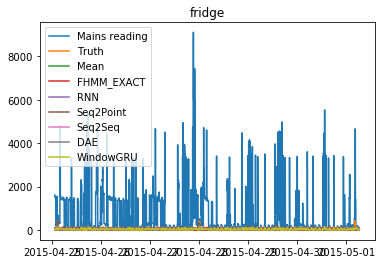

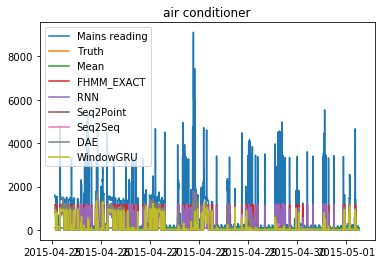

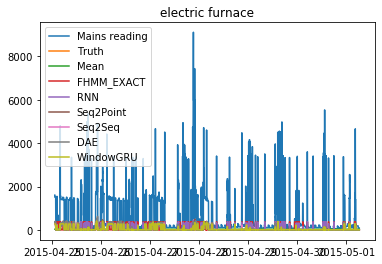

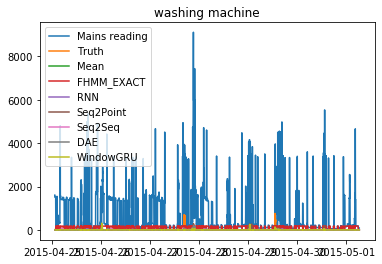

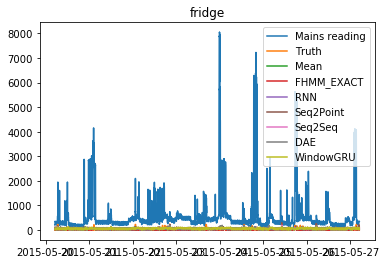

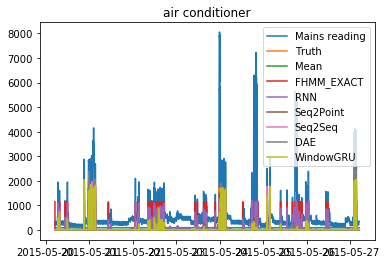

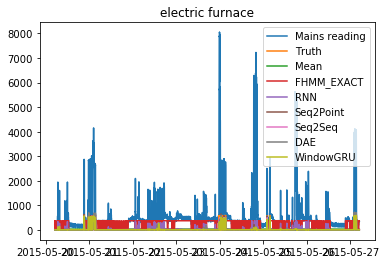

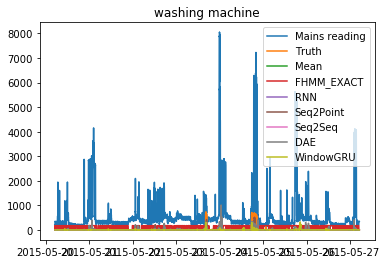

In [3]:
api_res = API(redd)

In [7]:
for i in api_res.errors:
    print (i)

                        Mean  FHMM_EXACT        RNN  Seq2Point    Seq2Seq  \
fridge             48.931244   66.547173  33.163349  17.277407  22.875330   
air conditioner   217.217117   99.636711  86.273323  30.847225  37.546211   
electric furnace   70.432358   69.279121  29.747921  12.912630  12.952002   
washing machine     7.248257   89.198524   7.676048   5.521871   5.899543   

                        DAE  WindowGRU  
fridge            27.770369  26.161009  
air conditioner   47.429852  41.633827  
electric furnace  16.894115  15.843706  
washing machine    5.185042   3.852577  
                        Mean  FHMM_EXACT        RNN  Seq2Point    Seq2Seq  \
fridge             39.046425   46.267857  29.680342  12.419630  16.435490   
air conditioner   135.736282   67.439781  59.762005  20.552853  22.925465   
electric furnace   42.080956  220.396225  21.078041   7.619515   9.089018   
washing machine    15.130778   96.110321  14.233191  12.008514  13.638012   

                       

In [8]:
import numpy as np
import pandas as pd

vals = np.concatenate([np.expand_dims(df.values,axis=2) for df in api_res.errors],axis=2)


cols = api_res.errors[0].columns
indexes = api_res.errors[0].index


mean = np.mean(vals,axis=2)
std = np.std(vals,axis=2)
print ('\n\n')
print ("Mean")
print (pd.DataFrame(mean,index=indexes,columns=cols))
print ('\n\n')
print ("STD")
print (pd.DataFrame(std,index=indexes,columns=cols))




Mean
                        Mean  FHMM_EXACT        RNN  Seq2Point    Seq2Seq  \
fridge             43.988834   56.407515  31.421845  14.848518  19.655410   
air conditioner   176.476700   83.538246  73.017664  25.700039  30.235838   
electric furnace   56.256657  144.837673  25.412981  10.266073  11.020510   
washing machine    11.189517   92.654423  10.954619   8.765193   9.768778   

                        DAE  WindowGRU  
fridge            23.694278  23.403124  
air conditioner   39.886354  29.783851  
electric furnace  14.455020  11.473751  
washing machine   12.636574   7.723452  



STD
                       Mean  FHMM_EXACT        RNN  Seq2Point   Seq2Seq  \
fridge             4.942410   10.139658   1.741504   2.428888  3.219920   
air conditioner   40.740417   16.098465  13.255659   5.147186  7.310373   
electric furnace  14.175701   75.558552   4.334940   2.646558  1.931492   
washing machine    3.941261    3.455898   3.278571   3.243322  3.869234   

                  